In [1]:
import numpy as np
import collections
import matplotlib.pyplot as plt
import queue
from sklearn.datasets import make_moons,make_circles,make_blobs


In [2]:
#Define labels
NOISE = 0
UNASSIGNED = 0
core=-1
border = -2


In [3]:
#Find all neighbor points

def neighbor_points(data, pointId, radius):
    points = []
    for i in range(len(data)):
        #Euclidian distance using L2 Norm
        if np.linalg.norm(data[i] - data[pointId]) <= radius:
            points.append(i)
    return points

In [13]:
def dbscan(data, Eps, MinPt):
    #initilize all pointlable to unassign
    pointlabel  = [UNASSIGNED] * len(data)
    pointcount = []
    #initilize list for core/noncore point
    corepoint=[]
    noncore=[]
    
    #Find all neigbor for all point
    for i in range(len(data)):
        pointcount.append(neighbor_points(train,i,Eps))
    
    #Find all core point, edgepoint and noise
    for i in range(len(pointcount)):
        if (len(pointcount[i])>=MinPt):
            pointlabel[i]=core
            corepoint.append(i)
        else:
            noncore.append(i)

    for i in noncore:
        for j in pointcount[i]:
            if j in corepoint:
                pointlabel[i]=border
                break

    cl = 1
    #Using a Queue to put all neigbor core point in queue and find neigboir's neigbor
    for i in range(len(pointlabel)):
        q = queue.Queue()
        if (pointlabel[i] == core):
            pointlabel[i] = cl
            for x in pointcount[i]:
                if(pointlabel[x]==core):
                    q.put(x)
                    pointlabel[x]=cl
                elif(pointlabel[x]==border):
                    pointlabel[x]=cl
            #Stop when all point in Queue has been checked   
            while not q.empty():
                neighbors = pointcount[q.get()]
                for y in neighbors:
                    if (pointlabel[y]==core):
                        pointlabel[y]=cl
                        q.put(y)
                    if (pointlabel[y]==border):
                        pointlabel[y]=cl            
            cl=cl+1 #move to next cluster
           
    return pointlabel,cl

In [5]:
#Function to plot final result
def plotRes(data, clusterRes, clusterNum):
  nPoints = len(data)
  scatterColors = ['black', 'green', 'brown', 'red', 'purple', 'orange', 'yellow']
  for i in range(clusterNum):
    if i==0:
      #Plot all noise point as blue
      color='blue'
    else:
      color = scatterColors[i % len(scatterColors)]
    
    x1 = [];  y1 = []
    for j in range(nPoints):
      if clusterRes[j] == i:
        x1.append(data[j, 0])
        y1.append(data[j, 1])
    plt.scatter(x1, y1, c=color, alpha=1, marker='.')


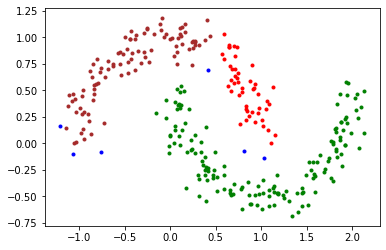

Epsilon = 0.2, Minpoints = 10
Number of clusters: 3


In [14]:
#Random dataset
X, label = make_moons(n_samples=300, noise=0.1)
train = X

eps = 0.2
minptss = 10

pointlabel,clusters = dbscan(X,eps,minptss)
plotRes(train, pointlabel, clusters)  #Plotting
plt.show()


print('Epsilon = ' +str(eps)+ ', Minpoints = '+str(minptss))
print('Number of clusters: ' + str(clusters-1))




In [ ]:
counter=collections.Counter(pointlabel)
for i in range(len(pointlabel)):
  outliers = 0
  if i not in range(1,cl+1):
    outliers = outliers+1
print('Outliers : '+str(outliers) +'\n')